# PyVista tutorial

Please make sure your PyVista version is above 0.38.dev0 (0.37 has a bug).

To install the latest version, please use:
`pip install https://github.com/pyvista/pyvista/archive/main.zip`

In [1]:
!pip install https://github.com/pyvista/pyvista/archive/main.zip

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     / 102.1 MB 12.2 MB/s 0:00:07m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [16]:
!pip install --upgrade matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at 

In [1]:
import vtk
import pyvista as pv
import numpy as np

from matplotlib.colors import ListedColormap, BoundaryNorm


## Render a cube

In [2]:
mesh = pv.Cube(center=[0.0, 0.0, 0.0],
          x_length=1.0,
          y_length=2.0,
          z_length=1.0)
mesh.plot(background="#000000", show_edges=True, line_width=3, color="red")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Basics: points, cells, lines

In [3]:
np_points = np.array([[0.0, 0.0, 0.0], 
                      [0.0, 1.0, 0.0],
                      [1.0, 0.0, 0.0],
                      [1.0, 2.0, 1.0],
                      [2.0, 0.0, 0.0],
                      [2.0, 2.0, -1.0],
                      [3.0, 0.0, 0.0],
                      [3.0, 1.0, 0.0]])

np_points

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  2.,  1.],
       [ 2.,  0.,  0.],
       [ 2.,  2., -1.],
       [ 3.,  0.,  0.],
       [ 3.,  1.,  0.]])

In [4]:
mesh = pv.PolyData(np_points)
mesh.plot(show_bounds=True, cpos='xy', point_size=15)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [5]:
cells = [8] + [x for x in range(8)]
mesh = pv.PolyData(np_points, cells)
mesh.plot(color="#61B229", cpos='xy', show_edges=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [6]:
cells

[8, 0, 1, 2, 3, 4, 5, 6, 7]

In [7]:
poly_line = pv.MultipleLines(points=np_points)
poly_line.plot(color="#61B229", cpos='xy', line_width=5)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [8]:
ball = pv.Sphere(radius=0.05, theta_resolution=35, phi_resolution=35)
ball.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [9]:
pl = pv.Plotter()

actor = pl.add_mesh(poly_line, color="#61B229", line_width=5)

balls = poly_line.glyph(geom=ball, orient=False)
actor = pl.add_mesh(balls, color="#CC6666")

pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [10]:
poly_line_with_data = pv.MultipleLines(points=np_points)
poly_line_with_data.point_data["my_array"] = np.arange(mesh.n_points)
poly_line_with_data

PolyData (0x141c978e0)
  N Cells:    1
  N Points:   8
  N Strips:   0
  X Bounds:   0.000e+00, 3.000e+00
  Y Bounds:   0.000e+00, 2.000e+00
  Z Bounds:   -1.000e+00, 1.000e+00
  N Arrays:   2

In [11]:
poly_line_with_data.point_data['my_array']

pyvista_ndarray([0, 1, 2, 3, 4, 5, 6, 7])

In [12]:
lut = pv.LookupTable(cmap='magma')
lut.scalar_range = (0, 7)
lut.below_range_color = pv.Color('grey', opacity=0.5)
lut.above_range_color = 'r'
lut.plot()

ViewInteractiveWidget(height=230, layout=Layout(height='auto', width='100%'), width=800)

In [13]:
pl = pv.Plotter()

actor = pl.add_mesh(poly_line_with_data, color="#61B229", line_width=5)

balls = poly_line_with_data.glyph(geom=ball, orient=False, scale=False)
actor = pl.add_mesh(balls, cmap=lut)

pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [14]:
c1 = np.array([0.99, 0.0, 0.0])
c2 = np.array([0.0, 0.99, 0.0])
c3 = np.array([0.0, 0.0, 0.99])
c4 = np.array([0.99, 0.99, 0.0])
c5 = np.array([0.99, 0.0, 0.99])
c6 = np.array([0.0, 0.99, 0.99])
c7 = np.array([0.5, 0.7, 0.99])
c8 = np.array([0.9, 0.5, 0.8])
colors = [c1, c2, c3, c4, c5, c6, c7, c8]

critical_values = sorted(set(poly_line_with_data.point_data["my_array"]))
num_steps = int((critical_values[-1] - critical_values[0]) * 100)
mapping = np.linspace(critical_values[0], critical_values[-1], num_steps)
newcolors = np.empty((num_steps, 3))
color_index = 1
for i in range(len(critical_values) - 2, -1, -1):
    mid = (critical_values[i] + critical_values[i + 1]) / 2
    newcolors[mapping <= mid] = colors[color_index]
    color_index += 1
newcolors[mapping > (critical_values[len(critical_values) - 2] + critical_values[len(critical_values) - 1]) / 2] = colors[0]
my_colormap = ListedColormap(newcolors)

In [15]:
pl = pv.Plotter()

actor = pl.add_mesh(poly_line_with_data, color="#61B229", line_width=5)

balls = poly_line_with_data.glyph(geom=ball, orient=False, scale=False)
actor = pl.add_mesh(balls, cmap=my_colormap)

pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Using a data source

In [16]:
from ReadPoints_pyvista import *

In [17]:
data = pv.UnstructuredGrid()
data.points = readPoints("Data1.txt")
data

UnstructuredGrid,Information
N Cells,0
N Points,16
X Bounds,"-5.053e-01, 6.744e-01"
Y Bounds,"1.113e-01, 8.944e-01"
Z Bounds,"0.000e+00, 8.515e-01"
N Arrays,0


In [18]:
vectors = readVectors("Data2.txt")
data.point_data["my_vectors"] = vectors
data.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : my_vectors
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    my_vectors              float64    (16, 3)              SCALARS

In [19]:
data

UnstructuredGrid (0x141e6a460)
  N Cells:    0
  N Points:   16
  X Bounds:   -5.053e-01, 6.744e-01
  Y Bounds:   1.113e-01, 8.944e-01
  Z Bounds:   0.000e+00, 8.515e-01
  N Arrays:   1

In [20]:
ball = pv.Sphere(radius=0.05, theta_resolution=35, phi_resolution=35)

pl = pv.Plotter()
pl.set_background("#666699")

actor = pl.add_mesh(data, color="#61B229")

balls = data.glyph(geom=ball, orient=False)
actor = pl.add_mesh(balls, color="#CC6666")

pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [21]:
arrow = pv.Arrow(tip_radius=0.2, shaft_radius=0.075, scale=0.2)

pl = pv.Plotter()
pl.set_background("#666699")

actor = pl.add_mesh(data, color="#61B229")

balls = data.glyph(geom=ball, orient=False)
actor = pl.add_mesh(balls, color="#CC6666")

arrows = data.glyph(geom=arrow, orient="my_vectors", scale=False)
actor = pl.add_mesh(arrows, color="#D3CE0C")

pl.show(cpos="xy")


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [22]:
data

UnstructuredGrid (0x141e6a460)
  N Cells:    0
  N Points:   16
  X Bounds:   -5.053e-01, 6.744e-01
  Y Bounds:   1.113e-01, 8.944e-01
  Z Bounds:   0.000e+00, 8.515e-01
  N Arrays:   1

In [23]:
scalars = readScalars("Data3.txt")
data.point_data["my_scalars"] = scalars
data.point_data
data.point_data["my_scalars"].GetRange()

(-0.8267, 0.8935)

In [24]:
lut = pv.LookupTable()
lut.values = [
    [0, 0, 255, 255], 
    [0, 255, 255, 255], 
    [0, 255, 0, 255], 
    [255, 255, 0, 255], 
    [255, 0, 0, 255], 
    [255, 0, 255, 255]
]
lut.plot()

ViewInteractiveWidget(height=230, layout=Layout(height='auto', width='100%'), width=800)

In [25]:
pl = pv.Plotter()
pl.set_background("#666699")

actor = pl.add_mesh(data, color="#61B229")

balls = data.glyph(geom=ball, orient=False, scale="my_scalars")
actor = pl.add_mesh(balls, cmap=lut)

arrows = data.glyph(geom=arrow, orient="my_vectors", scale="my_scalars")
actor = pl.add_mesh(arrows, cmap=lut)

pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Working with a volume

In [26]:
filename = "hydrogen.vtk"

print("Reading volume dataset from " + filename + " ...")
data = pv.read(filename)  
print("Done!")

Reading volume dataset from hydrogen.vtk ...
Done!


In [27]:
data

UniformGrid (0x14ae9a580)
  N Cells:      250047
  N Points:     262144
  X Bounds:     0.000e+00, 6.300e+01
  Y Bounds:     0.000e+00, 6.300e+01
  Z Bounds:     0.000e+00, 6.300e+01
  Dimensions:   64, 64, 64
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     1

In [28]:
width, height, depth = data.dimensions
print("Dimensions: %i %i %i" % (width, height, depth))

Dimensions: 64 64 64


In [29]:
outline = data.outline()
pv.plot(outline, line_width=5, color="#CCCCCC", background="#333333", cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [30]:
a,b = data.GetScalarRange()
print("Range of image: %d--%d" %(a,b))

Range of image: 0--1


In [31]:
rows, cols, _ = data.GetDimensions()
# print(rows, cols)

a = data.point_data.active_scalars
print("initial shape", a.shape)
a = a.reshape(rows, cols, -1)
print("reshaped", a.shape)

initial shape (262144,)
reshaped (64, 64, 64)


<IPython.core.display.Javascript object>


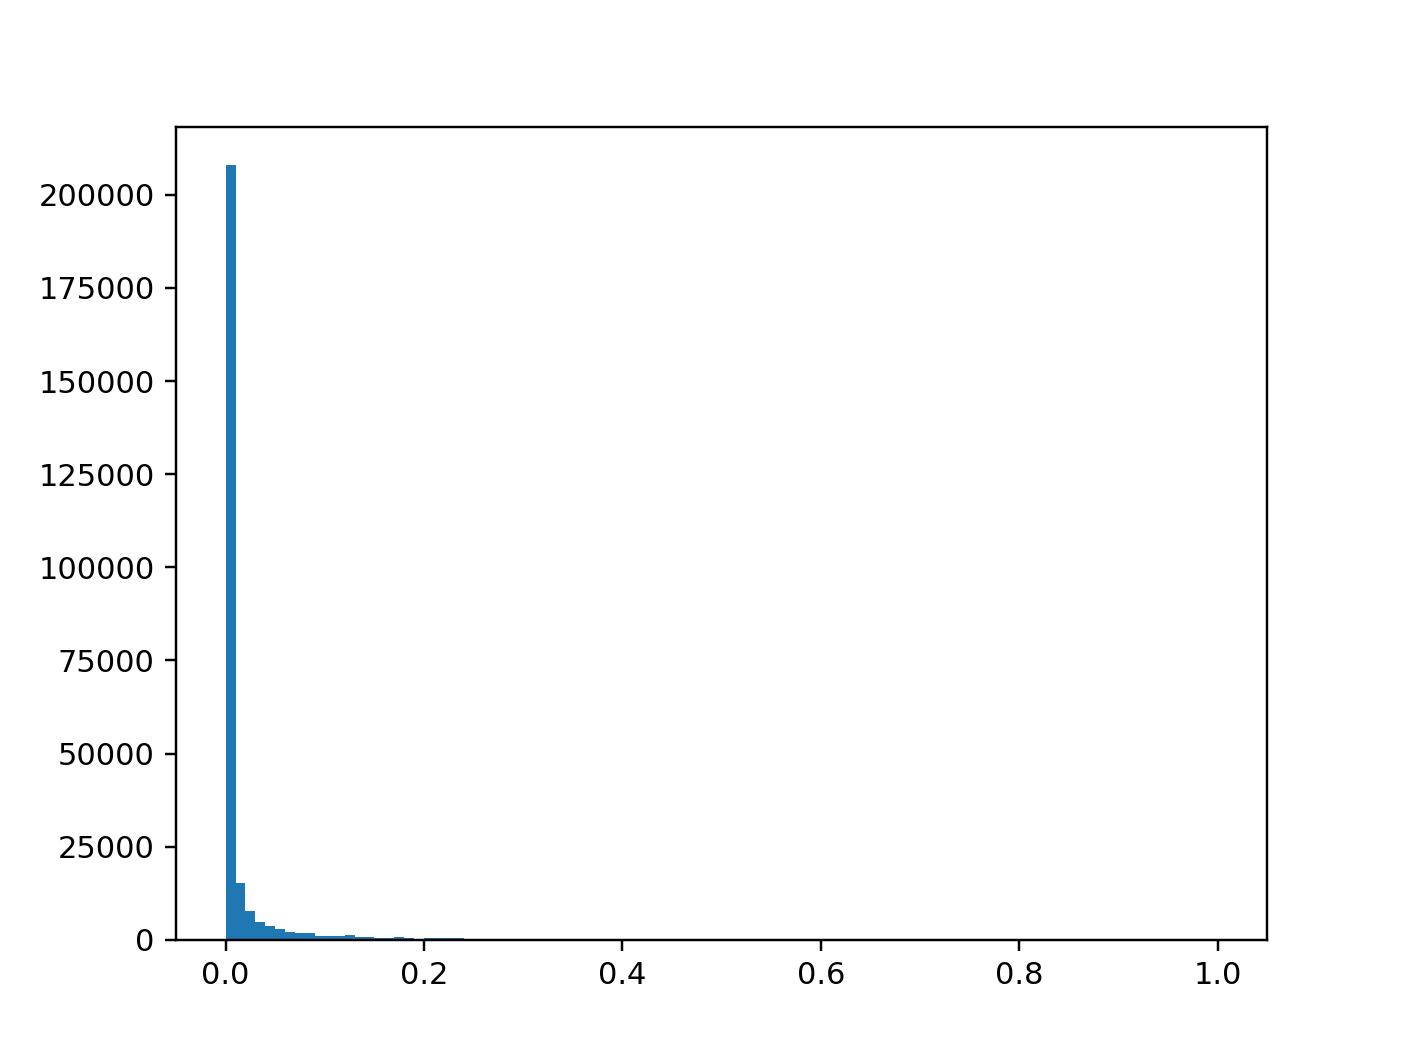

(array([2.0788e+05, 1.5304e+04, 7.6160e+03, 4.8800e+03, 3.5840e+03,
        2.9600e+03, 2.0080e+03, 1.9120e+03, 1.7120e+03, 1.1600e+03,
        1.1280e+03, 9.6000e+02, 1.2320e+03, 6.7200e+02, 6.9600e+02,
        5.7600e+02, 5.6800e+02, 6.4800e+02, 5.9200e+02, 3.2000e+02,
        4.4000e+02, 4.7200e+02, 4.0800e+02, 4.1600e+02, 2.2400e+02,
        2.9600e+02, 3.2000e+02, 2.4800e+02, 1.4400e+02, 8.0000e+01,
        1.9200e+02, 1.2800e+02, 9.6000e+01, 5.6000e+01, 8.8000e+01,
        3.2000e+01, 1.1200e+02, 6.4000e+01, 6.4000e+01, 8.8000e+01,
        9.6000e+01, 7.2000e+01, 7.2000e+01, 7.2000e+01, 5.6000e+01,
        4.8000e+01, 4.8000e+01, 0.0000e+00, 1.0400e+02, 1.6000e+01,
        4.8000e+01, 6.4000e+01, 2.4000e+01, 5.6000e+01, 3.2000e+01,
        3.2000e+01, 4.8000e+01, 5.6000e+01, 4.0000e+01, 2.4000e+01,
        1.6000e+01, 4.8000e+01, 1.6000e+01, 3.2000e+01, 3.2000e+01,
        0.0000e+00, 3.2000e+01, 4.0000e+01, 2.4000e+01, 4.0000e+01,
        1.6000e+01, 1.6000e+01, 6.4000e+01, 0.00

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.hist(a.flatten(),100)

In [33]:
pl = pv.Plotter()
pl.set_background("#222222")

outline = data.outline()
actor = pl.add_mesh(outline, color="#CCCCCC")

lut = pv.LookupTable("viridis")
lut.apply_opacity = [0, 0.2]

# my_opacity = "linear"
my_opacity = [0, 0.3]

actor = pl.add_volume(data, cmap="viridis", opacity=my_opacity, shade=True)


pl.show(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [34]:
pl = pv.Plotter()
iso_value = 0.2
the_contour = data.contour([iso_value])
# the_contour.plot(color="green")

pl.add_mesh(the_contour, color="green", opacity=0.5)

pl.show()


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [35]:
def show_iso(iso_value):
    pl.clear_actors()
    the_contour = data.contour([iso_value])
    pl.add_mesh(the_contour, color="blue", opacity=0.6)
    pl.show()

In [36]:
show_iso(0.9)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [37]:
pl = pv.Plotter()
pl.add_mesh_isovalue(data, opacity=0.8)
pl.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)